<DIV ALIGN=CENTER>

# Introduction to Deep Learning
## Professor Robert J. Brunner
  
</DIV>  
-----
-----

## Introduction

Text

-----

Total number of samples = 1797


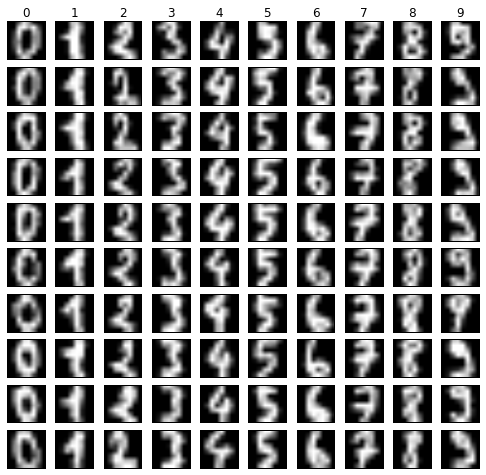

In [1]:
%matplotlib inline

# We have helper code to assist in the loading and plotting of these data
from helper_code import digits as hd

# We extract features (x), labels (y), and the images for plotting.
x, y, images = hd.get_data()
hd.im_plot(x, y, images)

print('Total number of samples = {0}'.format(y.shape[0]))

In [2]:
# Compute cross validation samples

import sklearn.cross_validation as cv

(x_train, x_test, y_train, y_test) = cv.train_test_split(x, y, test_size=.25)

# Get sizes
train_dim_one = x_train.shape[0]
train_dim_two = x_train.shape[1]
test_dim_one = x_test.shape[0]

In [3]:
import numpy as np
np.random.seed(23)

num_classes = 10

x_train = x_train.reshape(train_dim_one, train_dim_two)
x_test = x_test.reshape(test_dim_one, train_dim_two)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
from keras.utils import np_utils

y_trainc = np_utils.to_categorical(y_train, num_classes)
y_testc = np_utils.to_categorical(y_test, num_classes)

1347 train samples
450 test samples


-----

### Construct Model

We construct then visualize model

-----

In [4]:
# Build model

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

model = Sequential()
model.add(Dense(128, input_shape=(train_dim_two,)))
model.add(Activation('tanh'))
model.add(Dropout(0.2))
model.add(Dense(128))
model.add(Activation('tanh'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

Using Theano backend.


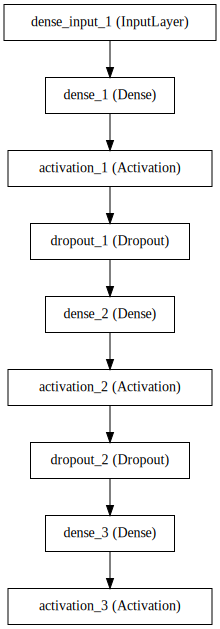

In [5]:
# Display model flowchart
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [6]:
# Display text representation of Keras model
model.summary()

____________________________________________________________________________________________________
Layer (type)                       Output Shape        Param #     Connected to                     
dense_1 (Dense)                    (None, 128)         8320        dense_input_1[0][0]              
____________________________________________________________________________________________________
activation_1 (Activation)          (None, 128)         0           dense_1[0][0]                    
____________________________________________________________________________________________________
dropout_1 (Dropout)                (None, 128)         0           activation_1[0][0]               
____________________________________________________________________________________________________
dense_2 (Dense)                    (None, 128)         16512       dropout_1[0][0]                  
___________________________________________________________________________________________

-----

### Compute Model

-----

In [7]:
from keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [8]:
# Fit model
batch_size = 128
num_epoch = 20

history = model.fit(x_train, y_trainc,
                    batch_size=batch_size, nb_epoch=num_epoch,
                    verbose=1, validation_data=(x_test, y_testc))

Train on 1347 samples, validate on 450 samples
Epoch 1/20
1347/1347 [==============================] - 0s - loss: 2.2893 - acc: 0.1819 - val_loss: 2.2681 - val_acc: 0.4444
Epoch 2/20
1347/1347 [==============================] - 0s - loss: 2.2507 - acc: 0.3764 - val_loss: 2.2304 - val_acc: 0.5022
Epoch 3/20
1347/1347 [==============================] - 0s - loss: 2.2064 - acc: 0.5642 - val_loss: 2.1840 - val_acc: 0.6711
Epoch 4/20
1347/1347 [==============================] - 0s - loss: 2.1555 - acc: 0.6778 - val_loss: 2.1251 - val_acc: 0.7178
Epoch 5/20
1347/1347 [==============================] - 0s - loss: 2.0902 - acc: 0.6763 - val_loss: 2.0456 - val_acc: 0.8156
Epoch 6/20
1347/1347 [==============================] - 0s - loss: 2.0034 - acc: 0.7654 - val_loss: 1.9473 - val_acc: 0.8089
Epoch 7/20
1347/1347 [==============================] - 0s - loss: 1.8953 - acc: 0.7498 - val_loss: 1.8285 - val_acc: 0.8244
Epoch 8/20
1347/1347 [==============================] - 0s - loss: 1.7691 - ac

-----

### Results

-----

In [9]:
# Obtain score results
score = model.evaluate(x_test, y_testc, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.524641330507
Test accuracy: 0.895555555556


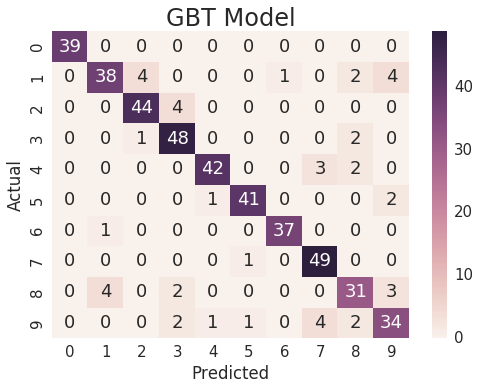

In [10]:
# Obtain test predictions
pred = model.predict(x_test, verbose=10)

# Convert 2D matrix of categorical probabilities into label
y_pred = np.argmax(pred, axis=1)

# Plot confusion matrix
from helper_code import mlplots as mlp

nms = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
mlp.confusion(y_test, y_pred, nms, 10, 'GBT Model')

-----

### Blind Testing

-----

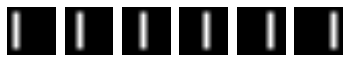

In [11]:
# Test on our ones

ones = hd.make_ones()
hd.plot_numbers(ones)

In [13]:
# Create input label data (all ones)
y_ones = np.empty(ones.shape[0], dtype=np.int8)
y_ones.fill(1)

# Convert to categorical labels
y_onesc = np_utils.to_categorical(y_ones, num_classes)

In [14]:
# Obtain model predictions and convert probability matrix to labels
pred = model.predict(ones, verbose=10)
y_pred = np.argmax(pred, axis=1)

# Display our *confusion matrix*
print(y_ones)
print(y_pred)

[1 1 1 1 1 1]
[0 0 1 1 9 0]


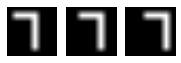

In [15]:
# Now test on our sevens

sevens = hd.make_sevens()
hd.plot_numbers(sevens)

In [16]:
# Create input label data (all sevens)
y_sevens = np.empty(sevens.shape[0], dtype=np.int8)
y_sevens.fill(7)

# Convert to categorical labels
y_sevensc = np_utils.to_categorical(y_sevens, num_classes)

In [17]:
# Obtain model predictions and convert probability matrix to labels
pred = model.predict(sevens, verbose=10)
y_pred = np.argmax(pred, axis=1)

# Display our *confusion matrix*
print(y_sevens)
print(y_pred)

[7 7 7]
[1 9 0]


-----
### Student Activity

In the preceding cells, we introduced deep learning by using the Keras framework. Now that you have run the Notebook, go back and make the
following changes to see how the results change.

1. Change the 

2. 

3. 

-----